## Βιβλιοθήκες

In [1]:
import pandas as pd

### Διαβάζουμε τα δεδομένα που θα χρειαστούμε

In [2]:
X_train = pd.read_csv("../CSV_Files/X_train.csv")
X_val = pd.read_csv("../CSV_Files/X_val.csv")
X_test = pd.read_csv("../CSV_Files/X_test.csv")

y_train = pd.read_csv("../CSV_Files/y_train.csv")
y_val = pd.read_csv("../CSV_Files/y_val.csv")
y_test = pd.read_csv("../CSV_Files/y_test.csv")



## Βήμα 3 (45%): Ταξινόμηση (Classification / Regression)
### 3.α
Πρέπει να αποφασίσουμε ποία δεδομένα πρέπει να επιλέξουμε καθώς η εκφώνηση μας ζητάει φυσικά χαρακτηριστικά και τον τρόπο ζωής.
- FAF ->How often do you have physical activity?
- TUE ->How much time do you use technological devices such as cell phone, videogames, television, computer and others?
- SMOKE->Do you smoke?
- Age 
- Height
- Weight
- CALC->How often do you drink alcohol?

Έπειτα πρέπει να αποφασίσω ποιούς 2 ταξινομητές να χρησιμοποιήσω από την βιβλιοθήκη Scikit-Learn. Οι διαθέσιμοι είναι:
-   Naive Bayes
-   Support Vector Machines (SVM)
-   Logistic Regression
-   k-Nearest Neighbors (KNN)
-   Decision Trees
-   Random Forest
-   Gradient Boosting
-   Neural Networks
-   Linear Discriminant Analysis (LDA) / Quadratic DA

Πηγή για να αποφασίσω ταξινομητές ->https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html



##  Random Forest

Κάνουμε εκπαίδευση του ταξινομητή

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Εκπαίδευση Random Forest
rf = RandomForestClassifier(
    n_estimators=50,
    criterion="gini",
    max_depth=5,
    random_state=42,
)
rf.fit(X_train, y_train)




c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)

Τώρα θα διερευνήσουμε τις παραμέτρους του random forest 

c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1389: DataConvers

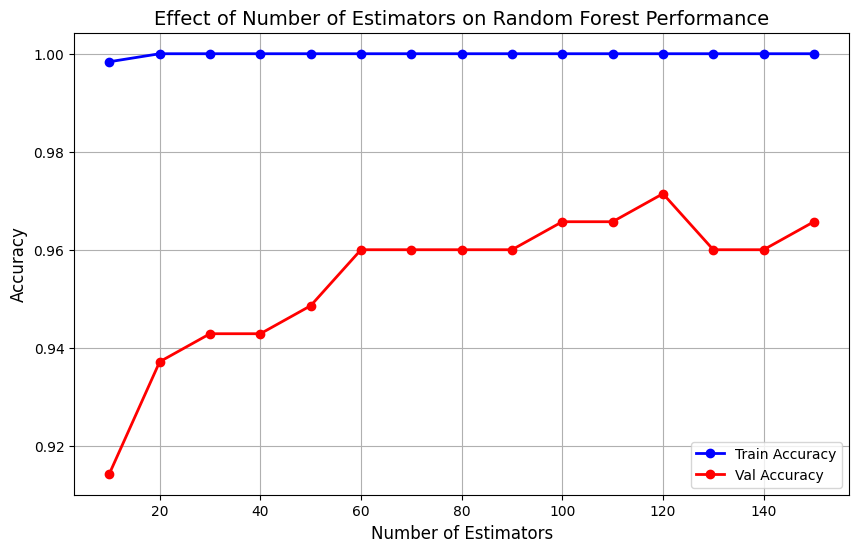

In [4]:
train_accuracies = []
test_accuracies = []
n_estimators_range = range(10, 151, 10)

for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, rf.predict(X_train)))
    test_accuracies.append(accuracy_score(y_val, rf.predict(X_val)))


plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies, 'o-b', label='Train Accuracy', linewidth=2)
plt.plot(n_estimators_range, test_accuracies, 'o-r', label='Val Accuracy', linewidth=2)
plt.title('Effect of Number of Estimators on Random Forest Performance', fontsize=14)
plt.xlabel('Number of Estimators', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Παρατηρούμε ότι για number of estimators=60 σημειώνεται μεγάλη αύξηση

In [5]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, LabelBinarizer
from sklearn.metrics import roc_auc_score


param_grid = {
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
y_pred = best_rf.predict(X_val)
y_proba = best_rf.predict_proba(X_val)
print("Classification Report:\n", classification_report(y_val, y_pred))
lb = LabelBinarizer()
lb.fit(y_train)
y_val_binarized = lb.transform(y_val)
roc_auc = roc_auc_score(y_val_binarized, y_proba, multi_class='ovr')
print("ROC-AUC Score (One-vs-Rest):", roc_auc)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.96      1.00      0.98        25
      Normal_Weight       0.89      0.92      0.91        26
     Obesity_Type_I       1.00      1.00      1.00        23
    Obesity_Type_II       1.00      1.00      1.00        25
   Obesity_Type_III       1.00      1.00      1.00        33
 Overweight_Level_I       0.95      0.90      0.93        21
Overweight_Level_II       0.95      0.91      0.93        22

           accuracy                           0.97       175
          macro avg       0.96      0.96      0.96       175
       weighted avg       0.97      0.97      0.97       175

ROC-AUC Score (One-vs-Rest): 0.9974080776066


c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


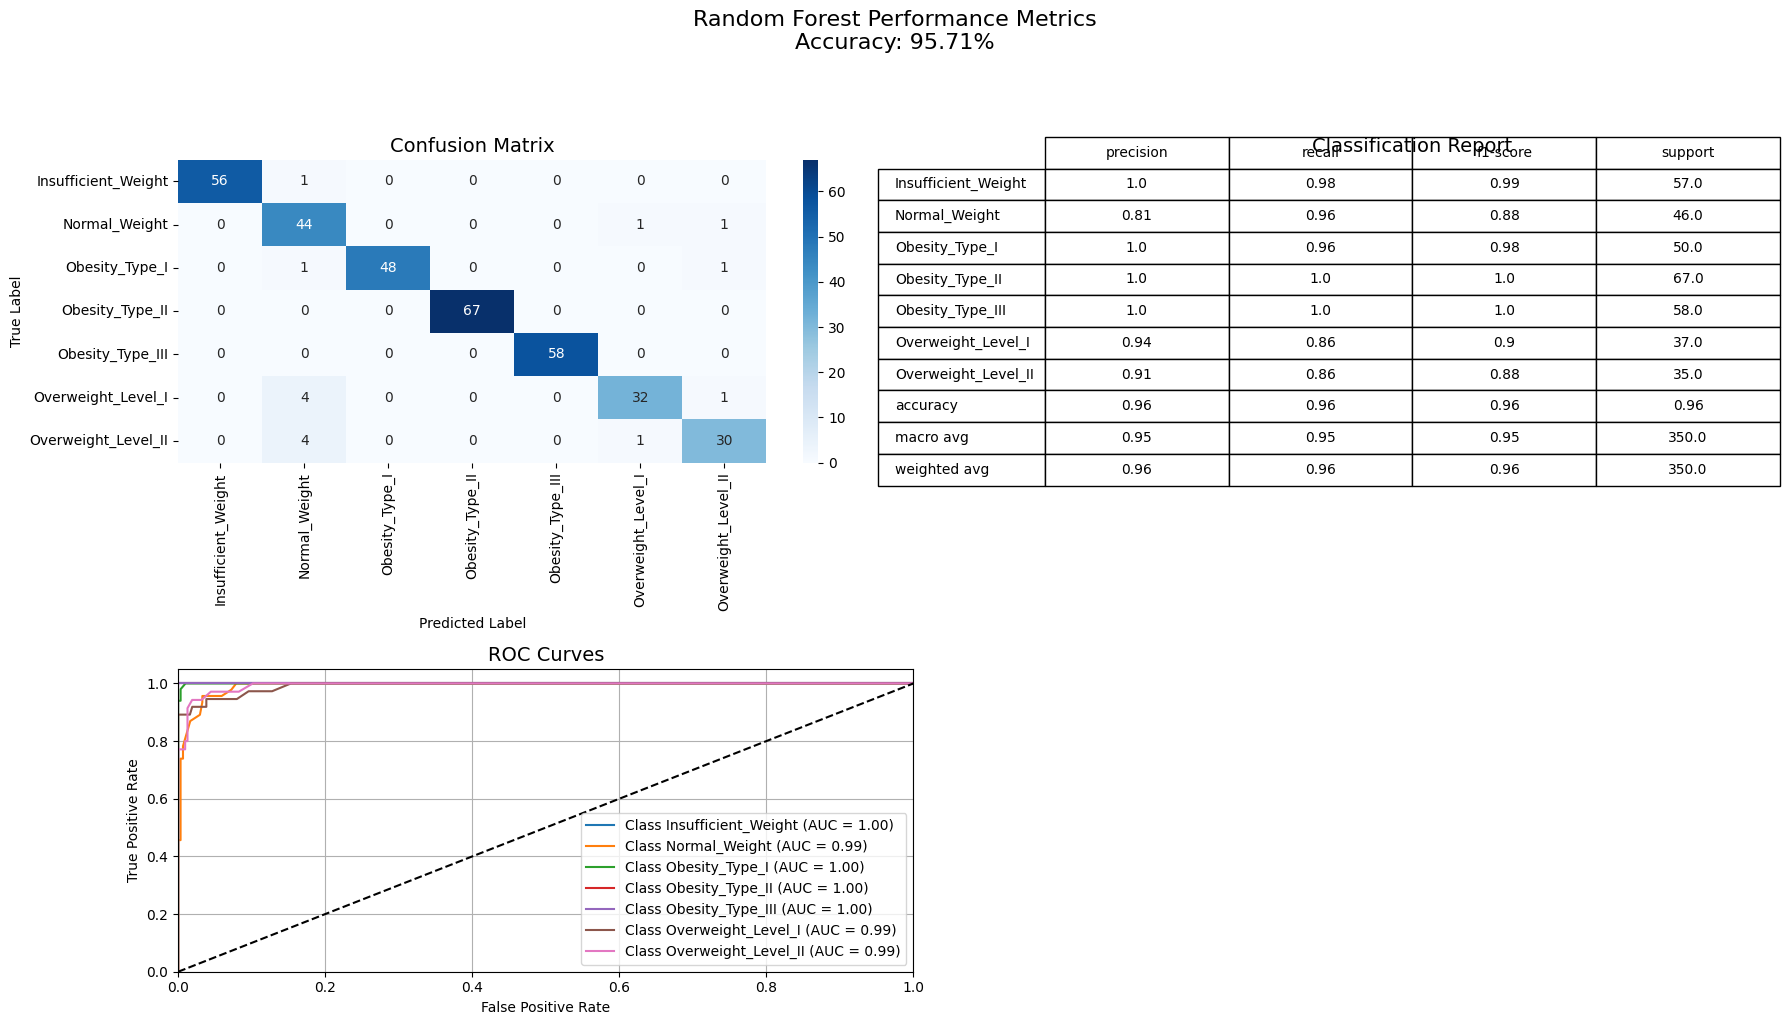

In [6]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Εκπαίδευση Random Forest 
rf = RandomForestClassifier(
    n_estimators=60,
    criterion="gini",
    min_samples_leaf=1,
    min_samples_split=2,
    max_depth=20,
    random_state=42,
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_score = rf.predict_proba(X_test)  


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose().round(2)
conf_matrix = confusion_matrix(y_test, y_pred)
class_names = rf.classes_


y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


plt.subplot(2, 2, 2)
plt.axis('off')
table = plt.table(cellText=report_df.values,
                  rowLabels=report_df.index,
                  colLabels=report_df.columns,
                  cellLoc='center',
                  loc='center')
table.scale(1, 2.2)
table.auto_set_font_size(False)
table.set_fontsize(10)
plt.title('Classification Report', fontsize=14)

plt.subplot(2, 2, 3)
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {class_names[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves', fontsize=14)
plt.legend(loc='lower right')
plt.grid()

plt.suptitle(f'Random Forest Performance Metrics\nAccuracy: {accuracy:.2%}', fontsize=16, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.97])  
plt.show()

## Neural Network

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


mlp = MLPClassifier(
    hidden_layer_sizes=(150,), 
    activation='relu',         
    solver='adam', 
    alpha=0.0001,
    max_iter=500,   
    learning_rate='constant',
    random_state=42
)


mlp.fit(X_train, y_train)


c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(150,), max_iter=500, random_state=42)

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(100,), (150,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01]
}

mlp = MLPClassifier(max_iter=500, random_state=42)

grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best validation accuracy:", grid_search.best_score_)


Fitting 3 folds for each of 96 candidates, totalling 288 fits


c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters found: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'adam'}
Best validation accuracy: 0.9369871208106503


c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


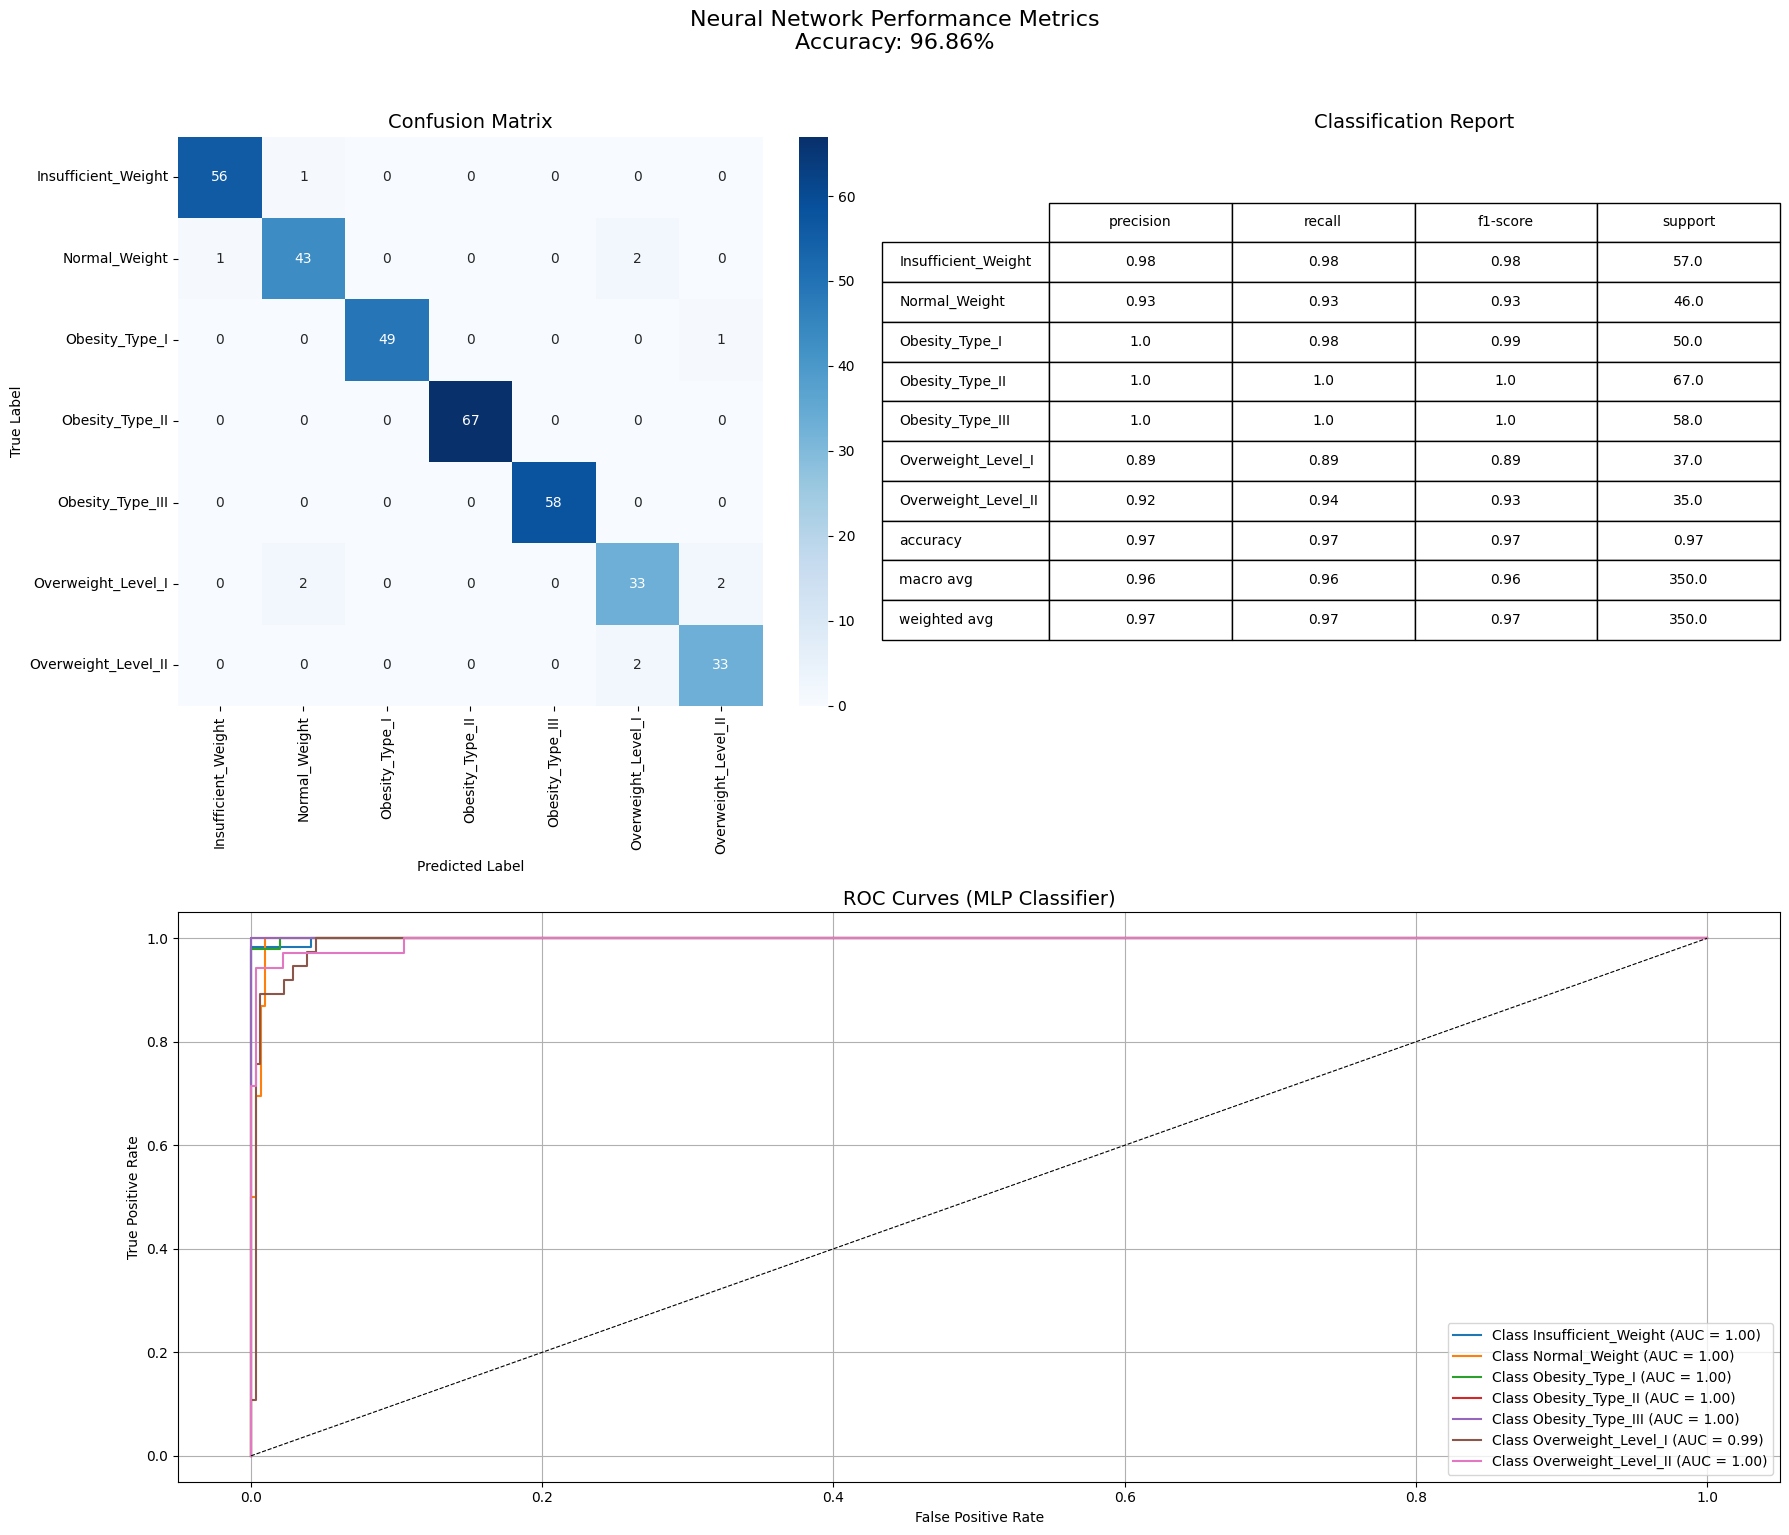

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='tanh',
    solver='adam',
    alpha=0.0001,
    max_iter=500,
    learning_rate='constant',
    learning_rate_init=0.001,
    random_state=42
)


mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_mlp)
report = classification_report(y_test, y_pred_mlp, output_dict=True)
report_df = pd.DataFrame(report).transpose().round(2)
conf_matrix = confusion_matrix(y_test, y_pred_mlp)
class_names = mlp.classes_
y_score = mlp.predict_proba(X_test)
y_test_bin = label_binarize(y_test, classes=class_names)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fig = plt.figure(figsize=(18, 15))

ax1 = plt.subplot2grid((2, 2), (0, 0))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=ax1)
ax1.set_title('Confusion Matrix', fontsize=14)
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2.axis('off')
table = ax2.table(cellText=report_df.values,
                  rowLabels=report_df.index,
                  colLabels=report_df.columns,
                  cellLoc='center',
                  loc='center')
table.scale(1, 2.2)
table.auto_set_font_size(False)
table.set_fontsize(10)
ax2.set_title('Classification Report', fontsize=14)

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
for i, label in enumerate(class_names):
    ax3.plot(fpr[i], tpr[i], label=f'Class {label} (AUC = {roc_auc[i]:.2f})')
ax3.plot([0, 1], [0, 1], 'k--', linewidth=0.8)
ax3.set_xlabel('False Positive Rate')
ax3.set_ylabel('True Positive Rate')
ax3.set_title('ROC Curves (MLP Classifier)', fontsize=14)
ax3.legend(loc='lower right')
ax3.grid(True)

fig.suptitle(f'Neural Network Performance Metrics\nAccuracy: {accuracy:.2%}', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [10]:
X_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,0.080110,0.363016,0.029885,0,1,0.907578,0.577969,1.0,0,0.955593,0,0.865043,0.690102,1.0,0,0,0,1,0
1,0,0.866618,0.314622,0.304041,1,1,0.986213,0.577969,1.0,0,0.318163,0,0.000000,0.000000,1.0,1,0,0,0,0
2,1,0.230769,0.502704,0.266623,1,1,0.500000,0.577969,1.0,0,0.040798,0,0.333333,0.000000,1.0,0,0,0,1,0
3,1,0.257756,0.848591,0.382800,1,1,0.713844,0.879850,1.0,0,0.938048,0,0.605256,0.213232,1.0,0,0,0,1,0
4,0,0.252652,0.474287,0.701468,1,1,1.000000,0.577969,1.0,0,0.366653,0,0.591101,0.460568,1.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,0,0.226596,0.567499,0.704957,1,1,1.000000,0.577969,1.0,0,0.937168,0,0.541660,0.412805,1.0,0,0,0,1,0
1218,0,0.148095,0.190337,0.251296,1,0,1.000000,0.578380,1.0,0,0.500000,0,0.758083,0.500000,1.0,0,0,0,1,0
1219,1,0.601498,0.438473,0.468710,1,1,0.969344,0.214336,1.0,0,0.125857,0,0.393937,0.389188,0.0,0,0,0,1,0
1220,0,0.160621,0.411279,0.639342,1,1,1.000000,0.577969,1.0,0,0.114419,0,0.264184,0.319781,1.0,0,0,0,1,0
